In [1]:
import sys
import os
sys.path.append(
    os.path.dirname(os.path.abspath('.'))
)
from src import QNet, agent_metrics, show_reward
### path load

import numpy as np
import torch
from torchvision import datasets
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

from shift_funcs import get_funcs

SEED = 0
device = 'cuda:0'

1 channel weight: =  0.0
RESULT_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00


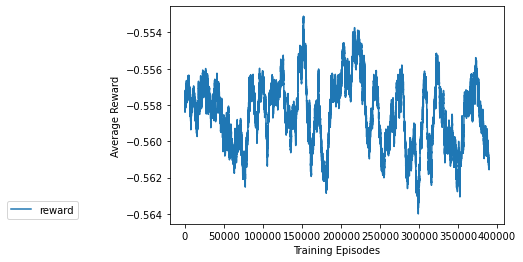

test func 0
TEST_DATASET_PATH data/shift1/test_0_dataset.npz
MODEL_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/Qnet020000.pth



MSE(test_dataset, agent_outputs) =  0.18710288813656908
action frequency
(array([1., 0., 0., 0., 0.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
METRIC_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/metrics0_187
--------------------

test func 1
TEST_DATASET_PATH data/shift1/test_1_dataset.npz
MODEL_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/Qnet020000.pth



MSE(test_dataset, agent_outputs) =  0.19865308441751525
action frequency
(array([1., 0., 0., 0., 0.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
METRIC_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/metrics1_198
--------------------

test func 03
TEST_DATASET_PATH data/shift1/test_03_dataset.npz
MODEL_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/Qnet020000.pth



MSE(test_dataset, agent_outputs) =  0.16389407981392798
action frequency
(array([9.999e-01, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))
METRIC_PATH results/shift1/diag_xfyf_xbyb/channel01_weight000_seed00/metrics03_163
--------------------




In [3]:
# 実験条件を指定
SL = 1
SEED = 0
#['xfyf','xfyf_xbyb']
for DT in tqdm(['xfyf_xbyb']):
    for (CHANNEL, WEIGHT) in [
        [1, 0.00],
#         [2, 0.05],
    ]:
        print(CHANNEL, 'channel', 'weight: = ', WEIGHT)
        RESULT_PATH = os.path.join(
            'results/shift%d/diag_%s/' % (SL, DT),
            'channel%02d_weight%03d_seed%02d' % (CHANNEL, int(100*WEIGHT), SEED)
        )
        print("RESULT_PATH", RESULT_PATH)

        funcs = [get_funcs(*delta) for delta in [
            (SL, SL),
            (SL, -SL),
            (-SL, SL),
            (-SL, -SL),
        ]]
        actions = [lambda x: x] + [f[1] for f in funcs]

        # see reward
        ax = plt.subplot(111)
        ma = show_reward(ax, dir_path=RESULT_PATH, mono=False, n=10000, label='reward')
        plt.show()

        for TEST_FUNC in ['0', '1', '03']:
            print('test func', TEST_FUNC)
            # load test data
            TEST_DATASET_PATH = 'data/shift%d/test_%s_dataset.npz' % (SL, TEST_FUNC)
            print("TEST_DATASET_PATH", TEST_DATASET_PATH)
            test_dataset_context = np.load(TEST_DATASET_PATH)
            originals = test_dataset_context['original_dataset']
            test_dataset = test_dataset_context['test_dataset']
            test_func_labels = test_dataset_context['test_func_labels']
            test_dataset = torch.from_numpy(test_dataset)
            originals = torch.from_numpy(originals)

            # load model
            Qnet = QNet(c=CHANNEL, m=[20, 20, len(actions)])
            MODEL_PATH = os.path.join(RESULT_PATH, 'Qnet020000.pth')
            print('MODEL_PATH', MODEL_PATH)
            Qnet.load_state_dict(
                torch.load(MODEL_PATH)
            )
            result = agent_metrics(test_dataset, originals, Qnet, actions, channel=CHANNEL)
            mse = result[:, -1].mean()
            print('MSE(test_dataset, agent_outputs) = ', mse)
            print('action frequency')
            print(np.histogram(result[:, -1], bins=np.arange(6) - 0.5, density=True))

            METRIC_PATH = os.path.join(RESULT_PATH, f'metrics{TEST_FUNC}_{int(1000*mse):03d}')
            print("METRIC_PATH", METRIC_PATH)
            np.save(METRIC_PATH, result)
            print('-' * 20)
            print()

In [42]:
np.histogram(result[:, -1], bins=np.arange(6) - 0.5, density=True)

(array([1., 0., 0., 0., 0.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]))